### logistic regression to predict heart disease

kaggle : https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data

Review work step:
1. importing datas
2. visualizing data to have a first impression.
3. writing down core funtions of logistic regression(sigmoid, cost function, gradient descent)
4. model training
5. predicting data
6. evaluating the model

#### First. importing data

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = r"framingham.csv"
df = pd.read_csv(path)
df.insert(0, 'ones', 1)
df = df.fillna(df.mean())

In [328]:
print(df.head())
print(df.describe())
df.shape

   ones  male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0     1     1   39        4.0              0         0.0     0.0   
1     1     0   46        2.0              0         0.0     0.0   
2     1     1   48        1.0              1        20.0     0.0   
3     1     0   61        3.0              1        30.0     0.0   
4     1     0   46        3.0              1        23.0     0.0   

   prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                0             0         0    195.0  106.0   70.0  26.97   
1                0             0         0    250.0  121.0   81.0  28.73   
2                0             0         0    245.0  127.5   80.0  25.34   
3                0             1         0    225.0  150.0   95.0  28.58   
4                0             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose  TenYearCHD  
0       80.0     77.0           0  
1       95.0     76.0           0  
2       75.0     70.0     

(4238, 17)

In [329]:
# slice the data and show the size
cols = df.shape[1]
X_initial, y_initial = df.iloc[1:, 0:cols-1].to_numpy(), df.iloc[1:, cols-1:cols].to_numpy()
print(np.sum(y_initial == 1) / y_initial.shape[0])
print('this is imbalance data')

0.1519943356148218
this is imbalance data


In [330]:
# oversample
rare_examples = df[df['TenYearCHD']==1]
df = pd.concat([df, rare_examples, rare_examples, rare_examples], ignore_index=True)
cols = df.shape[1]
X_train, y_train = df.iloc[1:, 0:cols-1].to_numpy(), df.iloc[1:, cols-1:cols].to_numpy()

In [331]:
# inspect imbalance more clearly
def scalar(X):
    mu, max, min = np.mean(X, axis=0), np.max(X, axis=0), np.min(X, axis=0)
    return (X-mu)/np.maximum(max-min, 1e-2), mu, max, min
X_train, mu, max, mim = scalar(X_train)
X_train[:, 0] = 1
X_train[0:5]

array([[ 1.        , -0.46150105, -0.13197567,  0.02038259, -0.50137786,
        -0.13588937, -0.04045196, -0.00940185, -0.37137299, -0.03712109,
         0.01798836, -0.07037858, -0.03360633,  0.06551825,  0.19109147,
        -0.0226035 ],
       [ 1.        ,  0.53849895, -0.07934409, -0.31295074,  0.49862214,
         0.14982491, -0.04045196, -0.00940185, -0.37137299, -0.03712109,
         0.00949939, -0.03964572, -0.04418834, -0.01664365, -0.01092873,
        -0.03955265],
       [ 1.        , -0.46150105,  0.26276117,  0.35371593,  0.49862214,
         0.29268206, -0.04045196, -0.00940185,  0.62862701, -0.03712109,
        -0.02445646,  0.06673726,  0.11454182,  0.06188276, -0.11193883,
         0.05366769],
       [ 1.        , -0.46150105, -0.13197567,  0.35371593,  0.49862214,
         0.19268206, -0.04045196, -0.00940185, -0.37137299, -0.03712109,
         0.07741111, -0.02782539, -0.0018603 , -0.07093352,  0.09008137,
         0.00282023],
       [ 1.        , -0.46150105, -0

In [332]:
# for i in range(X_train.shape[1]):
#     plt.figure(figsize = (30, 30))
#     plt.scatter(X_train[:, i], y_train, color='r', alpha=0.7)
#     plt.xlabel('one dimension of X')
#     plt.ylabel('if got heart disease')
#     plt.show()

In [333]:
# Core functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def cost_function(X, y, thetas):
    """
    args:
    X: (m, n)
    y: (m, 1)
    thetas: (n, 1)

    return:
    cost: scalar
    """
    z = np.dot(X, thetas)
    m = X.shape[0]
    return (-1/m) * np.sum(y*np.log(sigmoid(z)) + (1-y)*np.log(1-sigmoid(z)))
def gradient_descent(X, y, thetas):
    """
    args:
    X: (m, n)
    y: (m, 1)
    thetas: (n, 1)

    return:
    d_thetas:(n, 1)
    """
    m = X.shape[0]
    f_x = sigmoid(np.dot(X, thetas)).reshape(-1, 1)
    return (1/m) * np.sum((f_x-y)*X, axis=0).reshape(-1, 1)

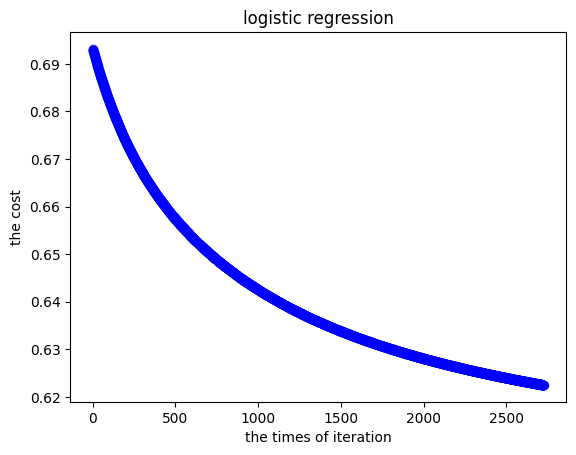

the final parameters are [[-0.34800675]
 [ 0.39591828]
 [ 0.69523204]
 [-0.17799661]
 [ 0.11968218]
 [ 0.13510859]
 [ 0.15901138]
 [ 0.06541971]
 [ 0.66826326]
 [ 0.20996242]
 [ 0.08805599]
 [ 0.25461731]
 [ 0.17520281]
 [ 0.07181087]
 [ 0.02317149]
 [ 0.11153732]]


In [334]:
# Model training
def logistic_learning(X, y, alpha=0.01, iters=5000):
    m, n = X.shape
    thetas = np.zeros(n).reshape(-1, 1)
    Iters = [0]
    Cost = [cost_function(X, y, thetas)]
    for i in range(1, iters+1):
        d_thetas = gradient_descent(X, y, thetas)
        thetas = thetas - alpha*d_thetas
        Cost.append(cost_function(X, y, thetas))
        Iters.append(i)
        if abs(Cost[-1] - Cost[-2]) / Cost[-1] < 1e-5:
            break
    return thetas, Iters, Cost
thetas, Iters, Cost = logistic_learning(X_train, y_train)

plt.scatter(Iters, Cost, alpha=0.7, color='b')
plt.xlabel('the times of iteration')
plt.ylabel('the cost')
plt.title('logistic regression')
plt.show()

print(f'the final parameters are {thetas}')

In [335]:
# predict data and evaluate
y_pred_proba = sigmoid(X_train @ thetas)
y_pred = (y_pred_proba >= 0.5).astype(int)
print(np.mean(y_pred))
accuracy = np.mean(y_pred == y_train)
print(f'training accuracy: {accuracy*100:.4f} %')

0.2843248500567353
training accuracy: 65.6022 %
